In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Project 2: Analysis of Different Comedy Styles

### By Daniel Deng

# 1. Introduction

The question that this project aimed to answer was, "What makes the style of every comedian unique?" In search for an answer to this question, I wanted to take a look at highly rated standup comedy shows performed by some of the comedians that I know and use that to see how similar or different each comedian's style and approach was. I found answering this question important because it not only widens my understanding of the different forms of linguistic expression employed by each individual comedian but could also forms the basis of recommending other people to listen to a particular comedian given the similarity of their style with another comedian.    

For this project, the first piece of information I needed was the comedians themselves. I chose 5 comedians to start with (2 whose styles I was familiar with) and 3 that I did not know very well. I used IMDb ratings and reviews to select the comedy specials from each of these comedians that I wanted to analyze. For each comedian, I selected their highest rated and reviewed show and used them to answer the above question. The other step that I took was to find the transcripts of these comedy specials and choose the python libraries that I wanted to use in the analysis.

# 2. Methodology

From IMDb database, I did a search of the highest rated and popular standup comedy specials perfomed by the comedians of interest in the last recent years. This allowed me to be objective in my analysis since these were similarly rated performance, perfomed around the same time period and were around 60 minutes in length each. I then did a research of popular sites that store transcripts of standup comedies and found [Scraps from the Loft](https://scrapsfromtheloft.com/stand-up-comedy-scripts/) which had all the transcript collections that I needed.  

I then used BeautifulSoup library to scrap the pages with the transcripts for each of the comedians and store them in a folder in my local drive. In the folder were files that represented each comedian's transcript text. The ```check_file_exist``` function checked if the comedian's transcript file existed and if it did not, then it went ahead and performed the scraping using ```url_transcript```. This is after I realized that it was doing the scraping everytime I called the functions to analyze the texts.  

As shown by the output below, I created a dictionary whose key was the comedian's name and the value was the transcript. I then converted this dictionary into a pandas dataframe for later visualization analysis. Lastly, in order to organize this data ready for analysis, I used Regular Expression (re) to clean the data: making all text lower case, removing text in square brackets(words not spoken by the comedian), removing non-text words and newline characters. This is the clean data that I will use to perform the analysis.

In [1]:
# Dictionary of comedians and transcript converted into a pandas dataframe
from cleaning import *
data

,Transcripts
Trevor,\n A NETFLIX ORIGINAL COMEDY SPECIAL [distant traffic] LIVE NATION PRESENTS TREVOR NOAH\n [prese...
Dave,\n Sticks & Stones is Dave Chappelle’s fifth Netflix special.\n In the promotional trailer Morga...
Joe,"\n [rock music playing] [audience cheering] [announcer] Ladies and gentlemen, welcome Joe Rogan...."
John,\n [organ music playing]\n Welcome to Radio City Music Hall. It’s time. Any questions? No. Walk ...
Maria,"\n [microphone droans]\n [music playing]\n [crowd cheering, applauding]\n Thank you for coming o..."


In [2]:
#Clean version of the trancripts (converted to lower case, remove commentator's words 
# and non-text characters) and a column with full names of comedians
data_clean

,Transcripts,full_name
Trevor,a netflix original comedy special live nation presents trevor noah beautiful people put your ...,Trevor Noah
Dave,sticks stones is dave chappelles fifth netflix special in the promotional trailer morgan freem...,Dave Chappelle
Joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for c...,Joe Rogan
John,welcome to radio city music hall its time any questions no walk with me good evening hi im ...,John Mulaney
Maria,thank you for coming out great time oh yes oh yeah and thank you you the viewer whos probab...,Maria Bamford


# 3. Results

#### 3.1 Tokenize Transcripts

I used a scit-learn library feature called CountVectorizer to tokenize the transcripts and split them into bags of words that will make it easier to compare different comedian's words usage. Using this library I also removed English stop words which are common words that add no value to the analysis and omitting them changes nothing. I have shown the tokenized data below for each comedian.

In [4]:
from analysis import *
data_df.head()

,Trevor,Dave,Joe,John,Maria
aaaah,0,1,0,0,0
aah,0,2,0,0,0
aand,0,2,0,0,0
abandon,0,1,0,0,0
abandoned,1,0,0,0,1


#### 3.2 Unique Words

With the tokenized words dataframe, I then created a count of words that were unique to each comedian and used pandas to rank how the comedians compared in terms of the breadth and scale of their vocabulary. As shown by the output below, Maria Bamford comedy special had the most number of unique words (1,617) while Dave Chappelle's had the least (1,232).

In [5]:
#Dataframe of comedians the number of unique words in their comedy special
data_words_sort

,comedian,unique_words
1,Dave Chappelle,1232
0,Trevor Noah,1240
3,John Mulaney,1398
2,Joe Rogan,1434
4,Maria Bamford,1617


#### 3.3 Pace of Speech

I counted all the words that each comedian used in their show and divided that by the length of the show to to see the pace at which each comedian spoke. As can be illustrated by the table below, Trevor and Joe speak the most words per minute at approximately 73 and 72 words per minute respectively. On the hand Maria and Dave speak few words at approximately 53 and 56 words per minute repsectively.

In [7]:
#Number of words per minute
data_wpm_sort


,comedian,unique_words,total_words,run_times(min),words_per_minute
4,Maria Bamford,1617,3938,74,53.216216
1,Dave Chappelle,1232,3644,65,56.061538
3,John Mulaney,1398,3815,65,58.692308
2,Joe Rogan,1434,4579,63,72.682540
0,Trevor Noah,1240,4606,63,73.111111


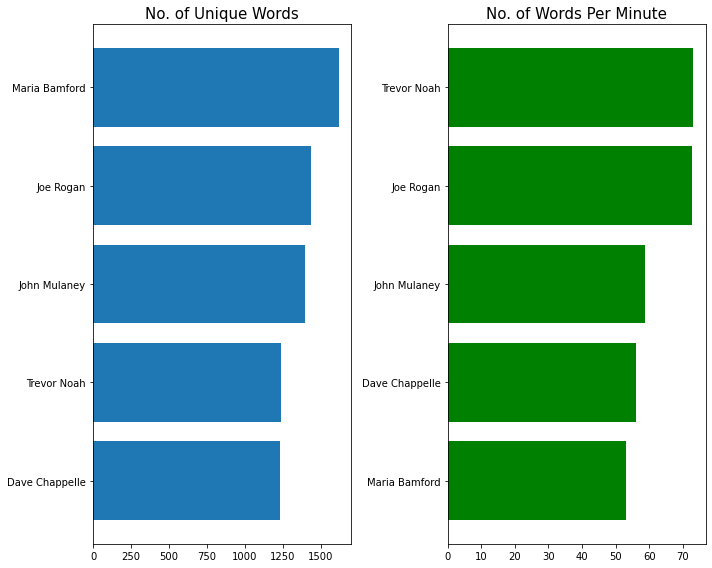

In [8]:
#Plots for number of unique words and number of words per minute by each comedian
y_pos = np.arange(len(data_words)) # Return evenly spaced values within a given interval. Stop at len(data_words)
plt.subplot(1, 2, 1) # plt.subplot (nrows, ncols, index)
plt.barh(y_pos, data_words_sort.unique_words, align='center')
plt.yticks(y_pos, data_words_sort.comedian)
plt.title('No. of Unique Words', fontsize=15)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center', color='green')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('No. of Words Per Minute', fontsize=15)

plt.tight_layout()

plt.savefig('comparing_words')



#### 3.4 Sentiment Analysis
The last visualization analysis I did was a sentiment analysis in which I used an NLP text processing library known as TextBlob to get the polarity (whether positive or negative) and subjectivity (whether opinion or fact) of each of the words in the transcripts of the comedy. After putting these values into a pandas dataframe format, I then created a scatter plot to show where each comedian ranks. As shown by the plot output, Joe Rogan's comedy special was highly opinionated and more of his words were categorized as negative. This is similar to Dave Chappelle style although Chappele comedy special was less opinionated. John Mulaney and Trevor Noah rank similar as they are more objective(fact-based). Maria's comedy style consists of balance of factual and opinion based statements and is more positive in comparison to the rest of the comedians.  

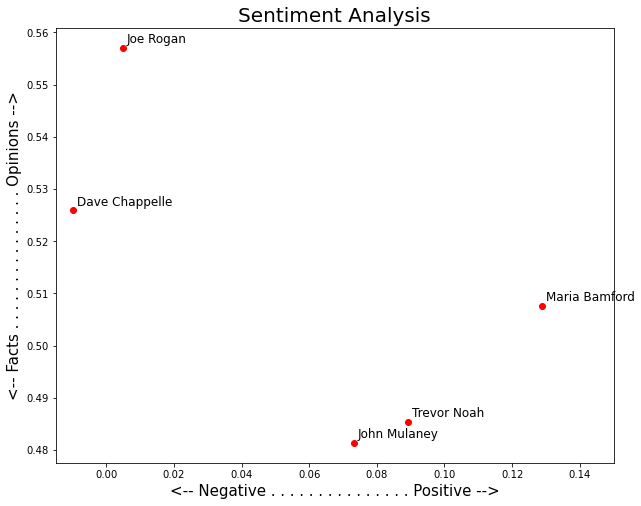

In [9]:
plt.rcParams['figure.figsize'] = [10, 8] # Set width to 10 inches and height to 8 inches

for index, comedian in enumerate(data.index):
    x = data_clean.polarity.loc[comedian]
    y = data_clean.subjectivity.loc[comedian]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, data_clean['full_name'][index], fontsize=12) # Offset the label to avoid overlap of label & dot
    plt.xlim(-.015, .15) 

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative . . . . . . . . . . . . . . . Positive -->', fontsize=15)
plt.ylabel('<-- Facts . . . . . . . . . . . . . . . Opinions -->', fontsize=15)

plt.savefig('sentiment_analysis')


# 4. Conclusion  

For the most part of the analysis, I answered the question "what makes comedians unique in their style?" This analysis enables someone to understand their favorite comedians better through comparing them to other highly ranked artists. The analysis looks at various aspects of comedy delivery such as number of unique words, pace of speech and a sentiment analysis of their comedy scripts. Each of the analysis also enables a fan of a certain comedian to consider other comedians that might have similar attributes as the one they listen to. For instance in the sentiment analysis above, if one listens to Trevor Noah because of his obectivity, then they might be able to listen to John Mulaney for the same reason. Also if one listens to Joe Rogan because of their opinions, then they might listen to Dave Chappelle since they are much more opinion-based comedians.  

Initially the hardest part of the project was scrapping. This is because each time I scrapped and came back the following day, the HTML elements that refered to the data that I needed to scrape had changed. This was quite frustrating at first as I had to re-do my scraping function. However, I managed to overcome this by creating a folder of scraped transcript files and only referred to the scraping function if the file was missing. This made my code run a lot faster and without issues. In future, I would like to expand this project by performing topic modelling on the transcripts so that I can compare also what the subject matter that each comedian talks about is.

Lastly, while data mining and use of NLP in sentiment analysis is becoming widespread in especially marketing and customer analysis, its misuse can raise privacy concern. Since tools for analysis are so easily available, it becomes very easy for individuals and entities to get hold of private biometric data and that can be used in manipulative ways and infringe upon the privacy rights of individuals. This is therefore a great concern that data scientists and other stakeholders must keep in mind as they push the horizons of this technology.
